In [28]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [60]:
input_size = 1
output_size = 1
num_epochs = 200
learning_rate = 0.01

In [61]:
#toy dataset
x_train, y_train = make_regression(n_samples=15, n_features=1, noise=50.0)
x_train = x_train.astype(np.float32)
y_train = y_train.reshape(-1, 1).astype(np.float32)

In [62]:
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
model = nn.Linear(input_size, output_size).to(device)

In [63]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [64]:
#train loop
model.train()
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train).to(device)
    targets = torch.from_numpy(y_train).to(device)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 50 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [50/200], Loss: 4204.9902
Epoch [100/200], Loss: 3693.1199
Epoch [150/200], Loss: 3608.7058
Epoch [200/200], Loss: 3593.9524


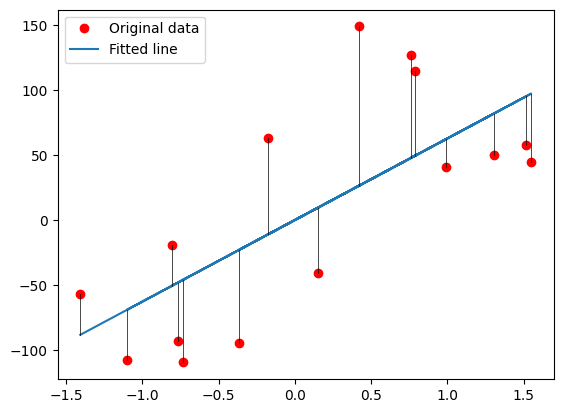

In [66]:
# plot
model.eval()
x_tensor = torch.from_numpy(x_train).to(device)
predicted = model(x_tensor).detach().cpu().numpy()

# Plot the original data points and the fitted line
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')

# Draw a short vertical line from each point to the predicted line
for x, y_actual, y_pred in zip(x_train, y_train, predicted):
    plt.plot([x, x], [y_actual, y_pred], 'k-', linewidth=0.5)  # thin black line

plt.legend()
plt.show()